In [14]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [15]:
## MUST be set to prevent ellipse in large arrays
np.set_printoptions(threshold = 10000)

In [16]:
masks_path = './locating-objects-without-bboxes/data/512_512/masks/test/'
img_path = './locating-objects-without-bboxes/data/512_512/images/test/'

In [17]:
masks = os.listdir(masks_path)
print(masks)

['14_kongarachanikya_mask.png', '10_kanugovimahidhar_mask.png', '12_rajakvarunraju_mask.png', '11_rabbyshahariar_mask.png', '10_rabbyshahariar_mask.png', '10_bachamollaharshavardhanreddy_mask.png', '13_kollasaividwan_mask.png', '12_keshidianudeep_mask.png', '15_bonuvarshinireddy_mask.png', '11_bachamollaharshavardhanreddy_mask.png', '16_bonuvarshinireddy_mask.png', '11_karnasaimanishreddy_mask.png', '11_rajakvarunraju_mask.png', '15_rayallavineethabhavya_mask.png', '16_rayallavineethabhavya_mask.png']


In [18]:
# import cv2
# import matplotlib.pyplot as plt

# data = []
# index = 300

# mask_img = cv2.imread('./locating-objects-without-bboxes/data/512_512/masks/val/17_runjalasunithaglory_mask.png', cv2.IMREAD_GRAYSCALE)

# #Threshold image
# mask_img_thresh = cv2.threshold(mask_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# # _, mask_img_thresh = cv2.threshold(mask_img, 125, 255, cv2.THRESH_BINARY)


# # CC
# output = cv2.connectedComponentsWithStats(mask_img_thresh)
# (numLabels, labels, stats, centroids) = output

# print("NumLabels: ", numLabels)

# # Convert to RGB to draw circles
# mask_img_thresh = cv2.cvtColor(mask_img_thresh, cv2.COLOR_GRAY2BGR)

# # Draw center on CCs on image 
# for i in range(0, numLabels):
#     (cX, cY) = centroids[i]
    
#     temp = mask_img_thresh.copy()
#     cv2.circle(temp, (int(cX), int(cY)), 2, (255, 0, 0), -1)
    
#     ##CC mask
#     cc_mask = np.where(labels==index, 1, 0)
    
#     data.append([mask_img, temp, cc_mask])

In [19]:
# plt.figure(figsize=(15, 15))
# plt.axis('off')
# plt.imshow(data[index][0], cmap ='gray')

In [20]:
# plt.figure(figsize=(15, 15))
# plt.axis('off')
# plt.imshow(data[index][1])

In [21]:
# plt.figure(figsize=(15, 15))
# plt.axis('off')
# plt.imshow(data[index][2])

In [22]:
data = []

for mask in masks:
    
#     print("Mask name: ", mask)
    mask_img = cv2.imread(os.path.join(masks_path, mask), cv2.IMREAD_GRAYSCALE)
    # Threshold mask
    mask_img = cv2.threshold(mask_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    mask_img_ori = mask_img.copy()
#     _, mask_img = cv2.threshold(mask_img, 125, 255, cv2.THRESH_BINARY)
    
    process_img_name = re.sub("_mask", "", mask )
#     print("Processed Image name: ", process_img_name)
    
    color_img = cv2.imread(os.path.join(img_path, process_img_name), cv2.IMREAD_COLOR)
    # Change channels from BGR to RGB
    color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
    
    # CC
    output = cv2.connectedComponentsWithStats(mask_img)
    (numLabels, labels, stats, centroids) = output
    
    # Get a copy of image
    color_img_copy = color_img.copy()
    # Get a copy of mask
    mask_img_copy = mask_img.copy()
    mask_img_copy = cv2.cvtColor(mask_img_copy, cv2.COLOR_GRAY2BGR)
    
    # Draw center on CCs on image 
    for i in range(1, numLabels):
        (cX, cY) = centroids[i]
        color_img_copy = cv2.circle(color_img_copy, (int(cX), int(cY)), 1, (255, 0, 0), -1)
        mask_img_copy = cv2.circle(mask_img_copy, (int(cX), int(cY)), 1, (255, 0, 0), -1)
    
    data.append( [color_img_copy, mask_img_copy, mask_img_ori])

In [23]:
index = 0

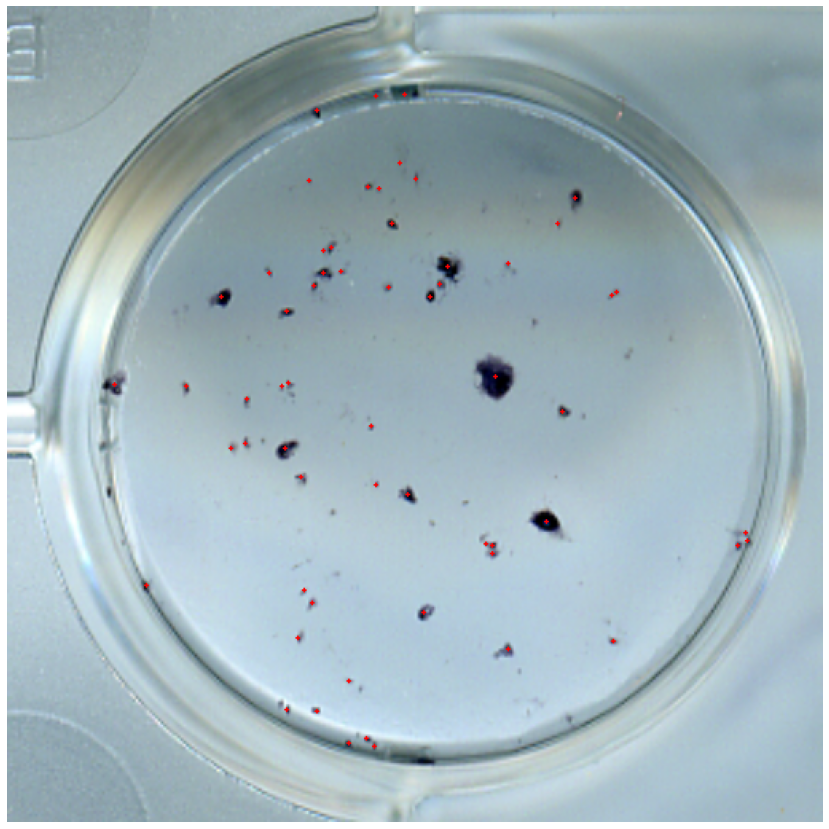

In [24]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(data[index][0])

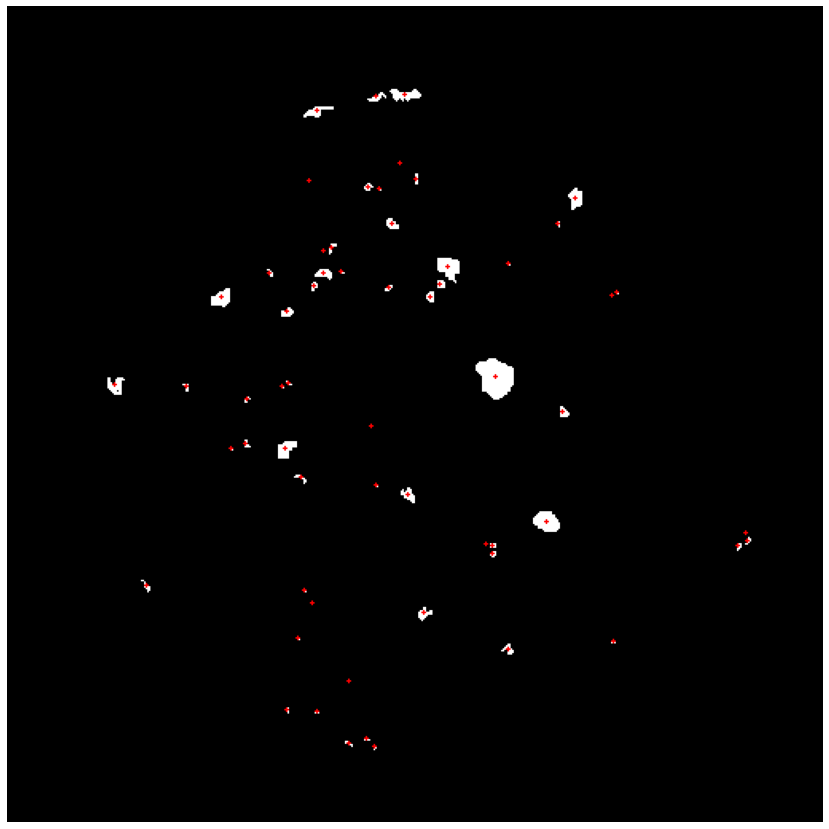

In [25]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(data[index][1])

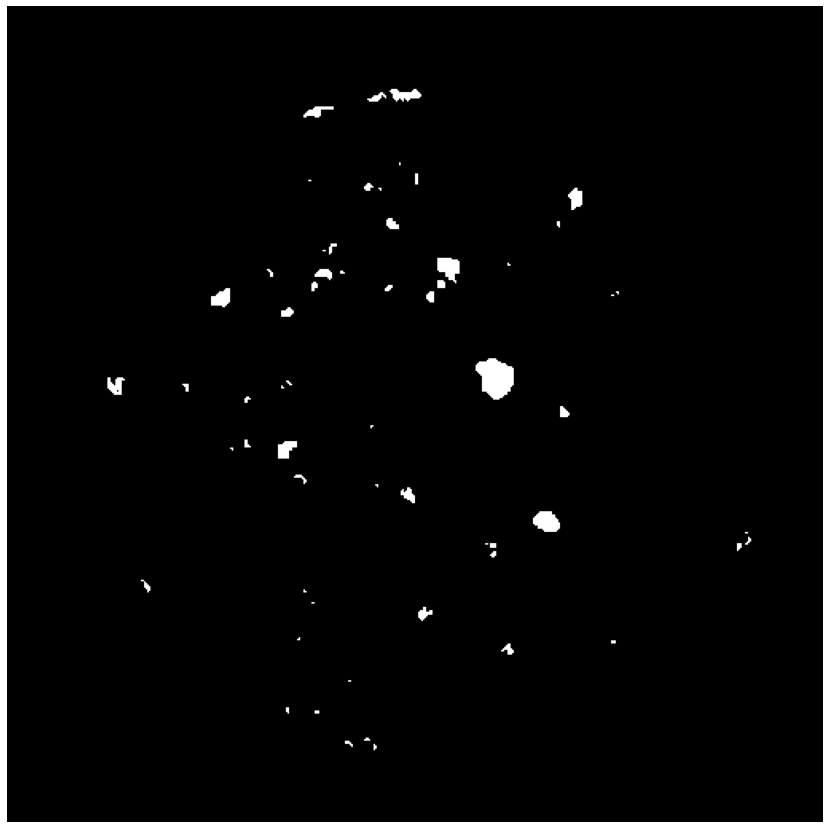

In [26]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(data[index][2], cmap = 'gray')

In [13]:
print(data)

[[array([[[101, 117, 117],
        [102, 117, 117],
        [103, 118, 118],
        ...,
        [103, 124, 127],
        [110, 125, 126],
        [115, 125, 126]],

       [[102, 118, 115],
        [102, 118, 117],
        [103, 119, 121],
        ...,
        [105, 125, 128],
        [110, 125, 128],
        [114, 125, 127]],

       [[104, 119, 112],
        [103, 119, 117],
        [102, 120, 126],
        ...,
        [108, 126, 130],
        [110, 125, 130],
        [112, 125, 130]],

       ...,

       [[117, 134, 145],
        [116, 134, 145],
        [114, 135, 145],
        ...,
        [116, 134, 144],
        [118, 137, 143],
        [119, 138, 143]],

       [[116, 134, 143],
        [115, 134, 142],
        [113, 134, 141],
        ...,
        [115, 135, 143],
        [116, 135, 143],
        [116, 135, 143]],

       [[116, 134, 142],
        [115, 134, 140],
        [113, 134, 138],
        ...,
        [114, 135, 142],
        [115, 133, 142],
        [115, 133, 143